In [15]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import scipy.optimize as op
from __future__ import division

In [16]:
data=pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.shape

(569, 33)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data.describe

<bound method NDFrame.describe of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181

In [6]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [8]:
data['Diagnosis']=pd.get_dummies(data.diagnosis, drop_first=True)

In [9]:
data.Diagnosis.value_counts()

0    357
1    212
Name: Diagnosis, dtype: int64

In [48]:
data=data.drop("diagnosis",axis=1,inplace= True)

In [49]:
data.head()

AttributeError: 'NoneType' object has no attribute 'head'

In [50]:
plt.figure(figsize=(10,10))
sns.countplot(x="Diagnosis",data=data,palette='rocket')

ValueError: Could not interpret input 'Diagnosis'

<Figure size 720x720 with 0 Axes>

In [51]:

data_corr = data.corr().abs()
plt.figure(figsize=(25, 20))
sns.heatmap(data_corr, vmin=-1, vmax=1, annot=True,
            square=True, center=0, linewidths=.5)
plt.tight_layout()

AttributeError: 'NoneType' object has no attribute 'corr'

In [52]:
data.head()

AttributeError: 'NoneType' object has no attribute 'head'

In [53]:
def correlation_matrix(df):
    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    ax1 = fig.add_subplot(111)
    
    cmap = "tab20"
    
    cax = ax1.imshow(data.corr().abs(), interpolation='nearest', cmap=cmap)
    
    ax1.grid(True)
    plt.title('Correlation Matrix of the WBCD features', fontsize=20)
    labels=list(data.columns)
    
    ax1.set_xticks(np.arange(len(labels)))
    ax1.set_yticks(np.arange(len(labels)))
    
    ax1.set_xticklabels(labels, fontsize=15, horizontalalignment='left', rotation='vertical')
    ax1.set_yticklabels(labels, fontsize=15)

    plt.show()

In [54]:
data.head()

AttributeError: 'NoneType' object has no attribute 'head'

In [55]:
data.drop('Unnamed: 32', axis=1)

AttributeError: 'NoneType' object has no attribute 'drop'

In [56]:
data_features = data.drop('Unnamed: 32', axis=1)

AttributeError: 'NoneType' object has no attribute 'drop'

AttributeError: 'NoneType' object has no attribute 'corr'

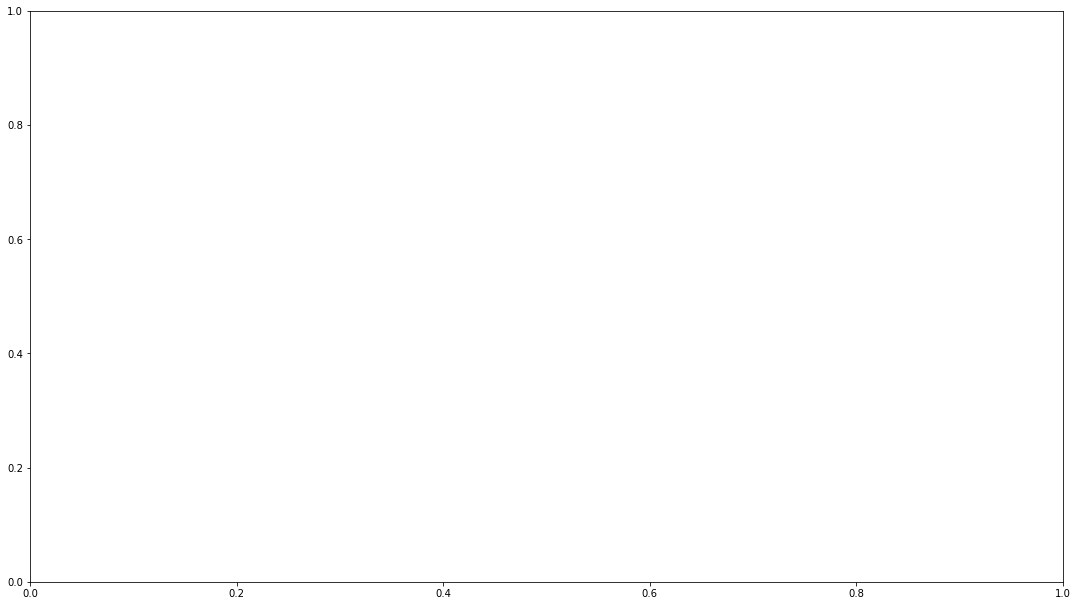

In [57]:
correlation_matrix("data_features")

In [ ]:
data_features.corr().abs()

In [58]:
corr_matrix = data_features.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

<ipython-input-58-7f37596a6f99>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
